### Лабораторная работа №14 Иерархическая кластеризация

In [41]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
#Получить исходные данные у преподавателя и согласовать задание на лабораторную работу

stud_data = pd.read_csv('https://raw.githubusercontent.com/tumtui111/Student-Performance-in-Exams-DataVisualization/master/StudentsPerformance.csv')
stud_data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [42]:
X = stud_data.iloc[:, 5:8].values

Используем библиотеку `scipy` для создания дендрограммы. Метод `ward` использует алгоритм минимизации дисперсии Варда, то есть он минимизирует варианты расстояний между кластерами

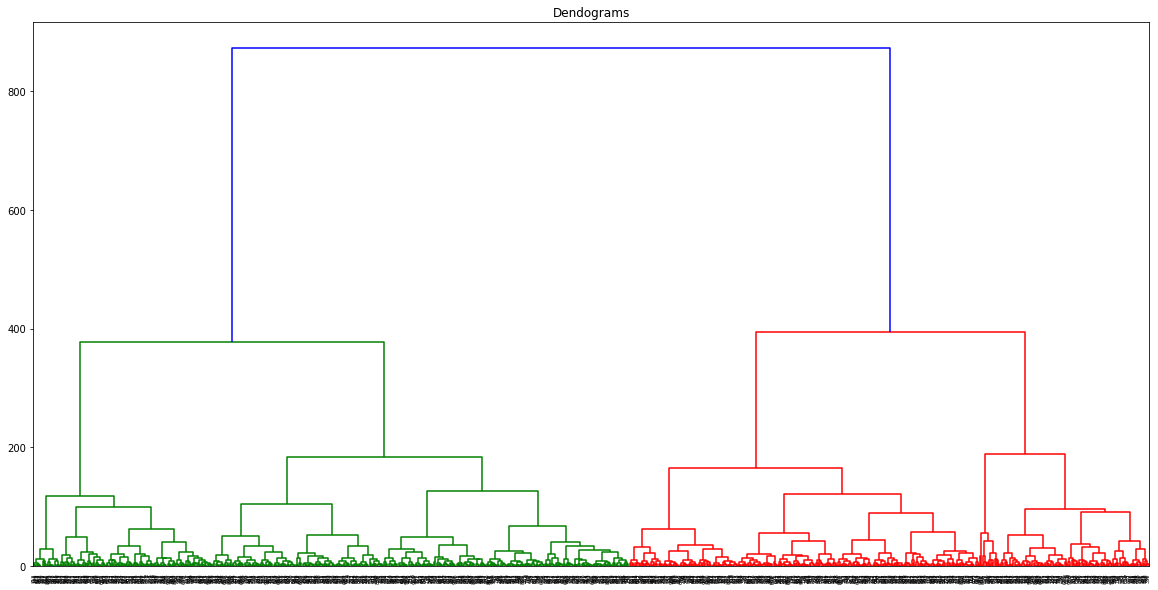

In [37]:
#Изучить материал по программным средствам языка Python, позволяющим реализовать иерархическую кластеризацию.
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

Воспользуемся классом `AgglomerativeClustering` библиотеки `sklearn.cluster` для группировки признаков в полученные кластеры (возьмем 4 кластера)

In [38]:
#Реализовать иерархическую кластеризацию для предложенной обучающей выборки
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 3, 3, 0, 1, 1, 3, 0, 2, 0, 2, 0, 1, 1, 2, 1, 3, 0, 0, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 0, 3, 1, 1, 2, 3, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 3, 0, 3, 0, 2, 0, 1, 0, 2, 1, 2, 2,
       0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 3, 1,
       2, 1, 1, 0, 1, 0, 3, 1, 2, 1, 2, 2, 1, 1, 3, 0, 3, 1, 3, 2, 1, 2,
       3, 2, 0, 2, 3, 1, 1, 1, 2, 2, 3, 3, 3, 2, 1, 3, 1, 1, 1, 0, 3, 0,
       1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 3, 1, 1, 3, 2, 1, 2, 0,
       2, 3, 1, 2, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 1, 1, 1, 3, 3, 2, 0, 3,
       2, 1, 2, 3, 1, 2, 0, 1, 0, 2, 1, 2, 0, 3, 2, 1, 2, 2, 1, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 3, 0, 1, 2,
       1, 3, 2, 1, 1, 0, 1, 2, 2, 3, 2, 0, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1,
       2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 3,
       1, 0, 1, 1, 3, 1, 2, 0, 2, 1, 3, 1, 3, 1, 1, 2, 0, 0, 1, 1, 0, 1,
       3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 3, 1,

Визуализируем наши сгруппированные данные:

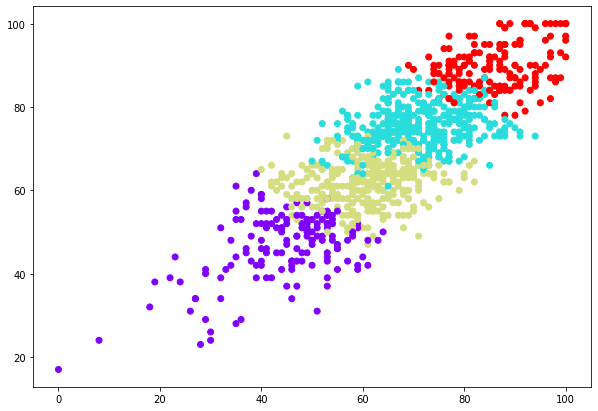

In [39]:
#Проанализировать полученные результаты и сделать выводы о проделанной работе

plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')